In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from keras.optimizers import RMSprop, SGD

##### "Adult" dataset has 15 columns. We will make a prediction to determine whether a person makes over $50k a year. Here is the link I downloaded: https://archive.ics.uci.edu/dataset/2/adult

In [2]:
#Import "adult" dataset from the UCI website
url = '/Users/esraydogan/Downloads/adult/adult.data'
column_names = names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data = pd.read_csv(url, names=column_names, na_values='?')

In [3]:
def read_dataset(url):
    column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

    return pd.read_csv(
        url,
        names=column_names,
        skipinitialspace=True,  # Skip spaces after delimiter
        na_values={
            'workclass': '?',
            'native-country': '?',
            'occupation': '?',
        }
    )

url = '/Users/esraydogan/Downloads/adult/adult.data'
data = read_dataset(url)

In [4]:
print(data.head()) #Display first 5 rows of the dataset
print(data.info()) #get the basic info about the dataset
print(data.describe()) #Summary statistics

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [5]:
for i in data.columns:
    print("Column : ", i, ", Missing Values:", data.loc[data[i] == "?",i].size)

Column :  age , Missing Values: 0
Column :  workclass , Missing Values: 0
Column :  fnlwgt , Missing Values: 0
Column :  education , Missing Values: 0
Column :  education-num , Missing Values: 0
Column :  marital-status , Missing Values: 0
Column :  occupation , Missing Values: 0
Column :  relationship , Missing Values: 0
Column :  race , Missing Values: 0
Column :  sex , Missing Values: 0
Column :  capital-gain , Missing Values: 0
Column :  capital-loss , Missing Values: 0
Column :  hours-per-week , Missing Values: 0
Column :  native-country , Missing Values: 0
Column :  income , Missing Values: 0


In [6]:
# Scaling numerical features using Min-Max scaling or Z-score normalization

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# data_pre[["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]] = scaler.fit_transform(data[["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]])


In [7]:
#Organize data

# X = data.drop("income", axis=1)
# y = data["income"]


In [8]:
#data splitting

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
summary_stats = data.describe()
print(summary_stats)
print(data.info)

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
<bound method DataFrame.info of        age         workclass  f

In [10]:
class_distribution = data['income'].value_counts()
print(class_distribution)
# it shows us how many variables bigger or smaller than 50k income.

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [11]:
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [12]:
for col in data:
  print(data[col].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wif

In [13]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for column in categorical_columns:
    data[column] = pd.factorize(data[column])[0]

print(data)

       age  workclass  fnlwgt  education  education-num  marital-status  \
0       39          0   77516          0             13               0   
1       50          1   83311          0             13               1   
2       38          2  215646          1              9               2   
3       53          2  234721          2              7               1   
4       28          2  338409          0             13               1   
...    ...        ...     ...        ...            ...             ...   
32556   27          2  257302          6             12               1   
32557   40          2  154374          1              9               1   
32558   58          2  151910          1              9               6   
32559   22          2  201490          1              9               0   
32560   52          5  287927          1              9               1   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               0        

In [14]:
for col in data:
  print(data[col].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[ 0  1  2  3  4 -1  5  6  7]
[ 77516  83311 215646 ...  34066  84661 257302]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[0 1 2 3 4 5 6]
[ 0  1  2  3  4  5  6  7  8  9 10 -1 11 12 13]
[0 1 2 3 4 5]
[0 1 2 3 4]
[0 1]
[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346

/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


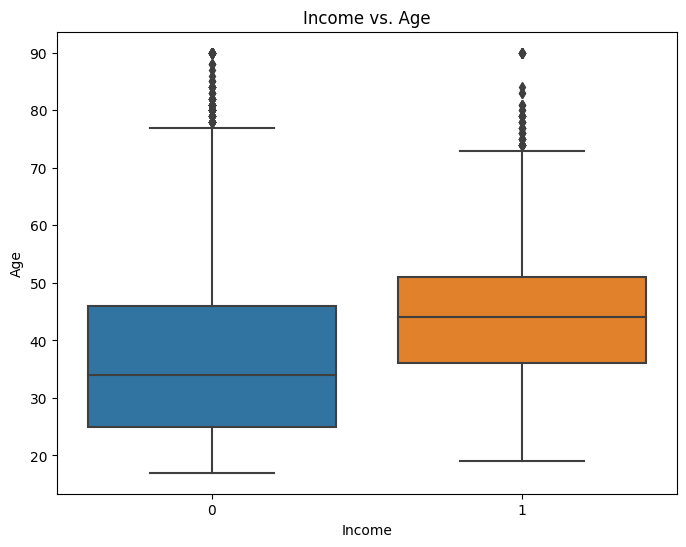

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


# Example: Box plot of income vs. age
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='income', y='age')
plt.title('Income vs. Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

/var/folders/6c/5rvrj7z16fnfwp96d6vlng4c0000gn/T/ipykernel_94206/3789358721.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hours-per-week'], hist=True, kde=True,
/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf v

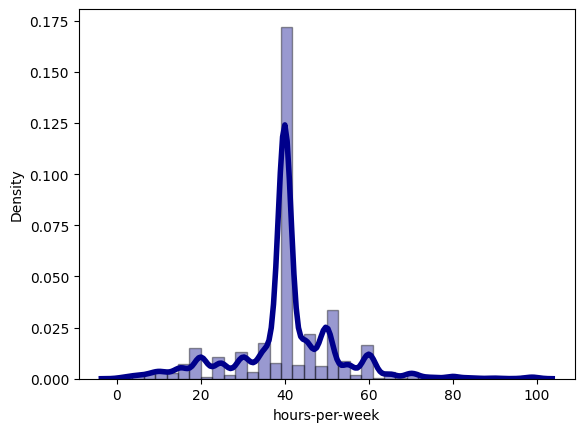

In [16]:
# Histogram and density


sns.distplot(data['hours-per-week'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

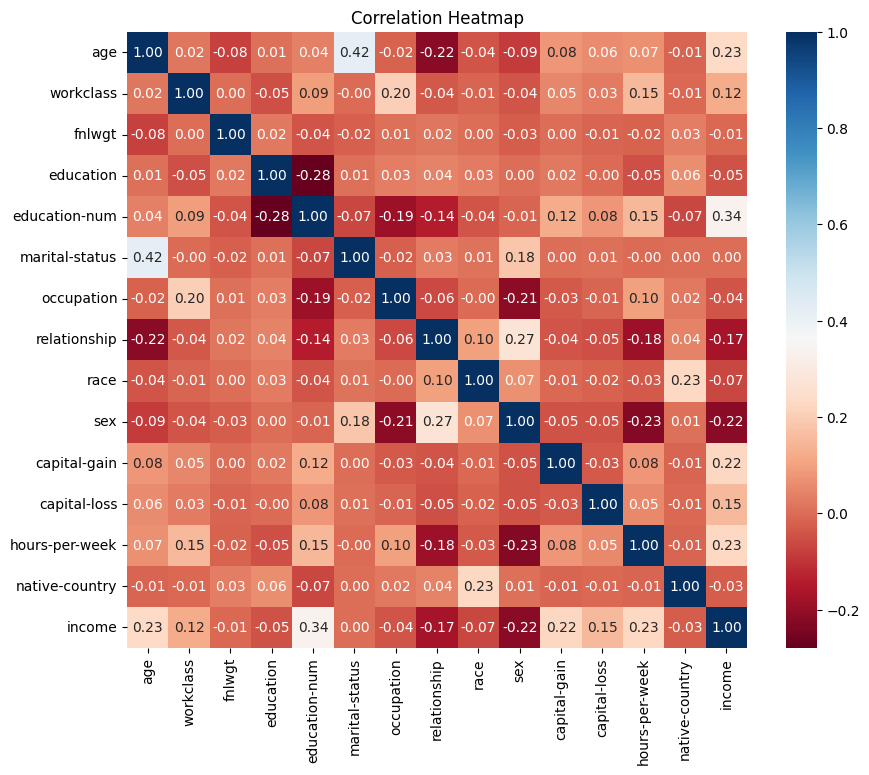

In [17]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### In this dataset, target variable is "income" column. It is binary and it indicates that if income is above or below 50k. Therefore, my ML task in this dataset is classification.

#### I will initially include all variables as feature variables, but my primary focus will be on identifying and utilizing those with the highest correlations, as indicated by the heatmap.

##### Applications of three machine learning algorithms : XGBoost, Deep Neural Network and Random Forest

## XGBoost Algorithm

In [19]:
# !pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.8 MB/s eta 0:00:0000:0100:010m


In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop("income", axis=1), data["income"], test_size=0.25)

# Create an XGBoost classifier
clf = xgb.XGBClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost accuracy:", accuracy)

/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

XGBoost accuracy: 0.8685665151701265


/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
# Define the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define hyperparameters to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(random_state=42, **best_params)
best_xgb_classifier.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = best_xgb_classifier.predict(X_test)
r2score = r2_score(y_test,y_pred)
print('R2 of the best regressor after CV is %.2f' % (r2score))

# Print classification report
print(classification_report(y_test, y_pred))

/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

R2 of the best regressor after CV is 0.28
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6212
           1       0.77      0.65      0.70      1929

    accuracy                           0.87      8141
   macro avg       0.83      0.79      0.81      8141
weighted avg       0.87      0.87      0.87      8141



/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/esraydogan/miniforge3/envs/tfn/lib/python3.9/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

In [21]:
X_train.shape

(24420, 14)

In [22]:
X_train[:]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
1023,34,2,33117,5,10,1,4,1,0,0,0,0,40,0
304,24,2,303296,5,10,1,0,2,2,1,0,0,40,19
2657,31,2,163516,5,10,6,0,4,0,1,0,0,40,0
11443,32,2,34437,1,9,0,7,3,0,0,0,0,40,0
26616,44,2,261497,1,9,1,2,1,1,0,0,0,40,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23414,36,2,334366,2,7,4,1,0,0,1,0,0,32,0
20525,38,3,47707,1,9,0,0,3,1,1,0,0,40,0
20161,20,-1,304076,2,7,0,-1,3,1,1,0,0,20,0
23622,40,2,200496,0,13,4,5,0,0,0,0,0,40,0


### Deep Neural Network

In [36]:
def df_to_dataset(data, shuffle=True, batch_size=32):
  dataframe = data.copy()
  labels = data.pop('income')
  ds = tf.data.Dataset.from_tensor_slices((dict(data), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(data))
  ds = ds.batch(batch_size)
  return ds

In [39]:
train, test = train_test_split(data, test_size=0.25)
train, val = train_test_split(train, test_size=0.15)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')


20757 train examples
3663 validation examples
8141 test examples


In [40]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)


In [41]:
from tensorflow import feature_column

feature_columns = []

# Define feature columns for numeric features
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for feature_name in numeric_features:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

# Define feature columns for categorical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for feature_name in categorical_features:
    categorical_column = tf.feature_column.categorical_column_with_vocabulary_list(
        feature_name, data[feature_name].unique())
    indicator_column = tf.feature_column.indicator_column(categorical_column)
    feature_columns.append(indicator_column)

In [42]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [47]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=25)

Epoch 1/25


2023-09-14 23:34:52.592066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


649/649 [==============================] - ETA: 0s - loss: 253.2332 - accuracy: 0.6796WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor. Received: inputs={'age': <tf.Tensor 'IteratorGetNext:0' shape=(None,) dtype=int64>, 'workclass': <tf.Tensor 'IteratorGetNext:13' shape=(None,) dtype=int64>, 'fnlwgt': <tf.Tensor 'IteratorGetNext:5' shape=(None,) dtype=int64>, 'education': <tf.Tensor 'IteratorGetNext:3' shape=(None,) dtype=int64>, 'education-num': <tf.Tensor 'IteratorGetNext:4' shape=(None,) dtype=int64>, 'marital-status': <tf.Tensor 'IteratorGetNext:7' shape=(None,) dtype=int64>, 'occupation': <tf.Tensor 'IteratorGetNext:9' shape=(None,) dtype=int64>, 'relationship': <tf.Tensor 'IteratorGetNext:11' shape=(None,) dtype=int64>, 'race': <tf.Tensor 'IteratorGetNext:10' shape=(None,) dtype=int64>, 'sex': <tf.Tensor 'IteratorGetNext:12' shape=(None,) dtype=int64>, 'capital-gain': <tf.Tensor 'IteratorGetNext:1' shape=(None,) dtype=int64>, 'capital-loss': 

2023-09-14 23:35:09.750586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


649/649 [==============================] - 20s 31ms/step - loss: 253.2332 - accuracy: 0.6796 - val_loss: 62.8760 - val_accuracy: 0.7942
Epoch 2/25
649/649 [==============================] - 21s 32ms/step - loss: 168.2677 - accuracy: 0.6839 - val_loss: 152.0026 - val_accuracy: 0.7887
Epoch 3/25
649/649 [==============================] - 20s 31ms/step - loss: 95.1354 - accuracy: 0.6864 - val_loss: 78.0364 - val_accuracy: 0.2473
Epoch 4/25
649/649 [==============================] - 20s 31ms/step - loss: 77.6875 - accuracy: 0.6883 - val_loss: 71.4449 - val_accuracy: 0.7876
Epoch 5/25
649/649 [==============================] - 21s 32ms/step - loss: 60.3015 - accuracy: 0.6866 - val_loss: 7.8078 - val_accuracy: 0.7603
Epoch 6/25
649/649 [==============================] - 20s 31ms/step - loss: 49.8762 - accuracy: 0.6873 - val_loss: 24.2810 - val_accuracy: 0.7958
Epoch 7/25
649/649 [==============================] - 20s 31ms/step - loss: 33.2750 - accuracy: 0.6901 - val_loss: 36.7765 - val_accu

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Create the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.8577570323056135
Confusion Matrix:
 [[5758  454]
 [ 704 1225]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      6212
           1       0.73      0.64      0.68      1929

    accuracy                           0.86      8141
   macro avg       0.81      0.78      0.79      8141
weighted avg       0.85      0.86      0.85      8141



In [35]:
# Split the data into a training set and a testing set
X = data.drop('income', axis=1)  # Features
y = data['income']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters to tune (e.g., number of trees, max depth, etc.)
# For example, let's vary the number of trees (n_estimators) in the random forest.
param_grid = {'n_estimators': [100, 200, 300, 400]}

# Create the random forest classifier
clf = RandomForestClassifier(random_state=42)

# Perform cross-validation to find the best hyperparameters
# You can use GridSearchCV or RandomizedSearchCV for hyperparameter search
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Fit the model with the best hyperparameters to the entire training set
best_clf = RandomForestClassifier(n_estimators=best_params['n_estimators'], random_state=42)
best_clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Hyperparameters:", accuracy)

Best Hyperparameters: {'n_estimators': 200}
Test Accuracy with Best Hyperparameters: 0.8616612927990174


#### In all three algortihms, the best one is Random Forest with tuning, XGBoost with tuning and without tuning. The result is almost similar each other like rougly 0.86. The Deep Neural Network is worse one. Because my dataset, adult dataset, is tabular data. It does not have homogeneous and generic data format like images dataset. Moreover, it tends to overfitting. We can explain this like that because deep learning models have a high number of parameters to be learned, it requires huge datasets to avoid overfitting. Thus, it would not be a good option for small tabular datasets when it is difficult to acquire more data. To sum up, machine learning algorithms such as ensemble methods are better than deep learning